# Data Science Lab Evaluation
#### Alwinder Singh
#### 101917042
#### CSE2
### Problem Statement: [Telco Churn Prediction](https://www.kaggle.com/blastchar/telco-customer-churn)
### Table of Contents:
|Sno|Step  |
|--|--|
| 1 | **Importing Libraries** |
| 2 | **Data Preprocessing and Exploratory Data Analysis** |
|  | 2.1: Importing Dataset |
|  | 2.2: Handling Missing Values |
|  | 2.3: Statistical Analysis |
|  | 2.4: Binning/Discretization |
|  | 2.5: Outlier Treatment |
|  | 2.6: Exploratory Data Analysis |
|  | 2.7: Splitting Dependent/Independent Variables |
|  | 2.8: Importing Dataset |
|  | 2.9: Label Encoding |
|  | 2.10: One Hot Encoding |
|  | 2.11: Class Balancing |
|  | 2.12: Normalization |
|  | 2.13: Train Test Split |
| 3|  **Classification Using Deep Learning ( Artificial Neural Networks)**|
|  | 3.1: Initializing the ANN |
|  | 3.2: Adding the Input Layer and the Hidden Layers |
|  | 3.3: Adding the Output Layer |
|  | 3.4: Compiling the ANN |
|  | 3.5: Training the ANN |
|  | 3.6: Predicting the Reults |
|  | 3.7: Evaluating model Performance |
| 4|  **Machine Learning Models**|
|  | 4.1: Gaussian Naive Bayes |
|  | 4.2: K Nearest Neigbors |
|  | 4.3: Logistic Regression |
|  | 4.4: Decision Tree Classifier |
|  | 4.5: Random Forest Classifier |
|  | 4.6: Ada Boosting Classifier |
|  | 4.7: Gradient Boosting Classifier |
|  | 4.8: XGB Classifier |

## Part 1 - Importing the libraries

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import tensorflow as tf


In [2]:
#Libraries for Graphing and Plotting
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msn

In [3]:
#ML/DL Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from cuml.naive_bayes import  GaussianNB
from cuml.neighbors import KNeighborsClassifier
from cuml.svm import SVC
from cuml.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from cuml.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Part 2 - Exploratory Data Analysis and Data Preprocessing

### Importing the dataset in required format

In [4]:
dataset = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=" ")
# As observed, NA values were depicted as " " in the dataset

### Checking and Handling Missing Values

In [5]:
dataset.isnull().sum()
#Calculating the counts of Non Null Values in each column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#Replacing the NA values with mean of column
dataset["TotalCharges"].fillna(dataset["TotalCharges"].mean(),inplace=True)

<AxesSubplot:>

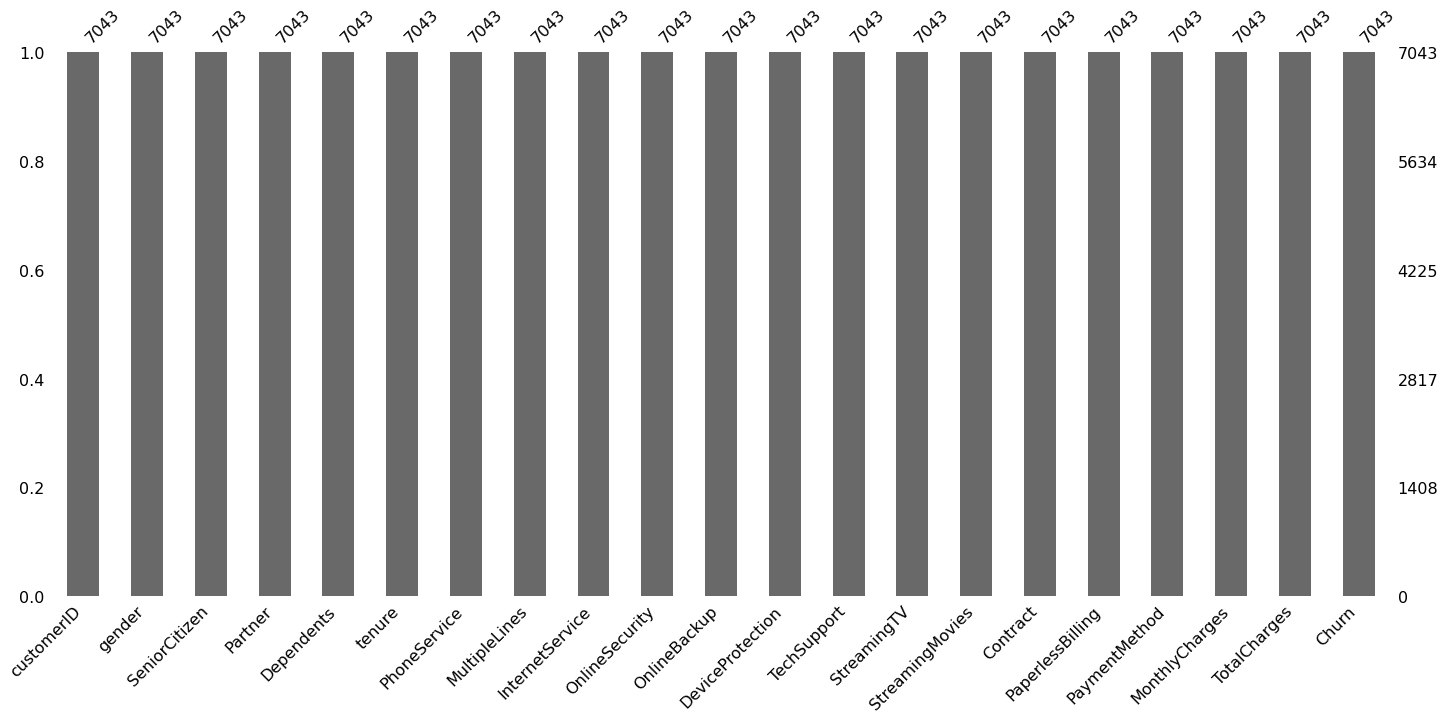

In [7]:
#Checking if the Missing values have been filled
msn.bar(dataset)

### Statistical Analysis of dataset (Numerical Columns Only)

In [8]:
# Statistical Variables of Dataset
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:>

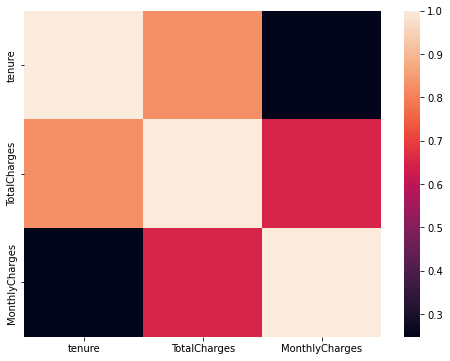

In [9]:
#Correlational Analysis
plt.rcParams['figure.figsize'] = [8, 6]
sns.heatmap(dataset[dataset.columns[[5,-2,-3]]].corr())

### Binning/Discretization

In [10]:
#Converting to Bins of size 10
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
col1=list(dataset.columns)
dataset['tenure_group'] = pd.cut(dataset.tenure, range(1, 80, 12), right=False, labels=labels)


In [11]:
#Addition of tenure group column in the dataset
zx=col1.index("tenure")
dataset.drop(columns= ['tenure'], axis=1, inplace=True)
col1.pop(zx)
col1.insert(zx,"tenure_group")

In [12]:
#Rearranging Columns accordingly
dataset=dataset.loc[:,col1]

### Outlier Detection

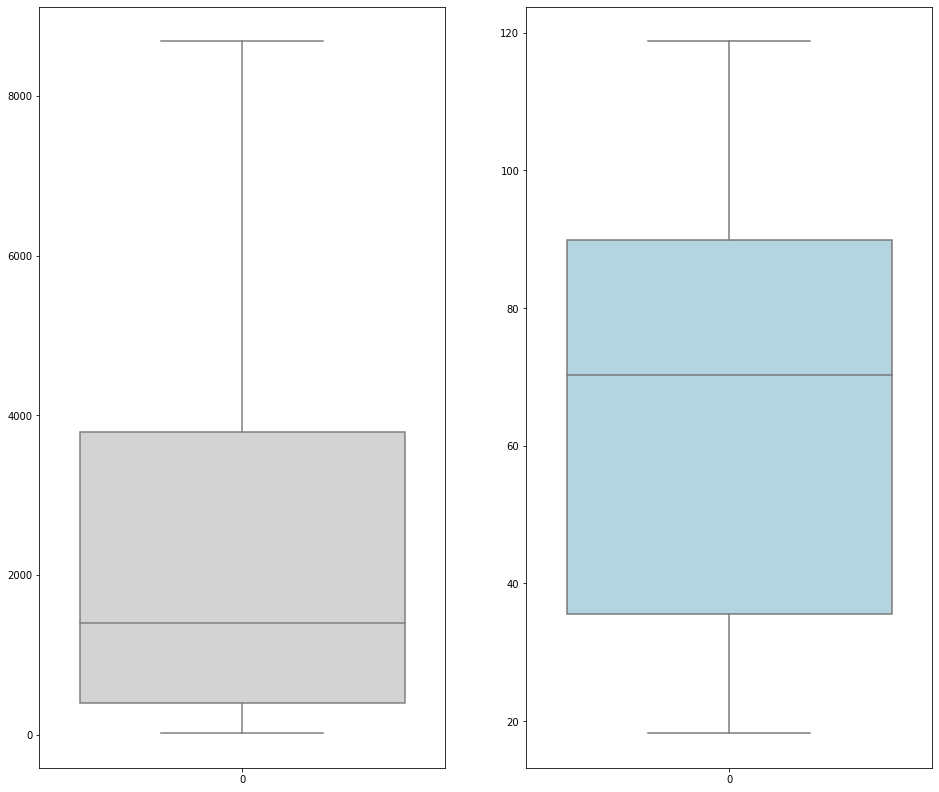

In [13]:
plt.rcParams['figure.figsize'] = [16, 14]

fig, ax = plt.subplots(1,2)
x=0
y=0
colors=["lightgray","lightblue"]
for i,j in enumerate(dataset.columns[[-2,-3]]):
    
    sns.boxplot(ax=ax[i],data=dataset[j],color=colors[i])
    


## Exploratory Data Analysis

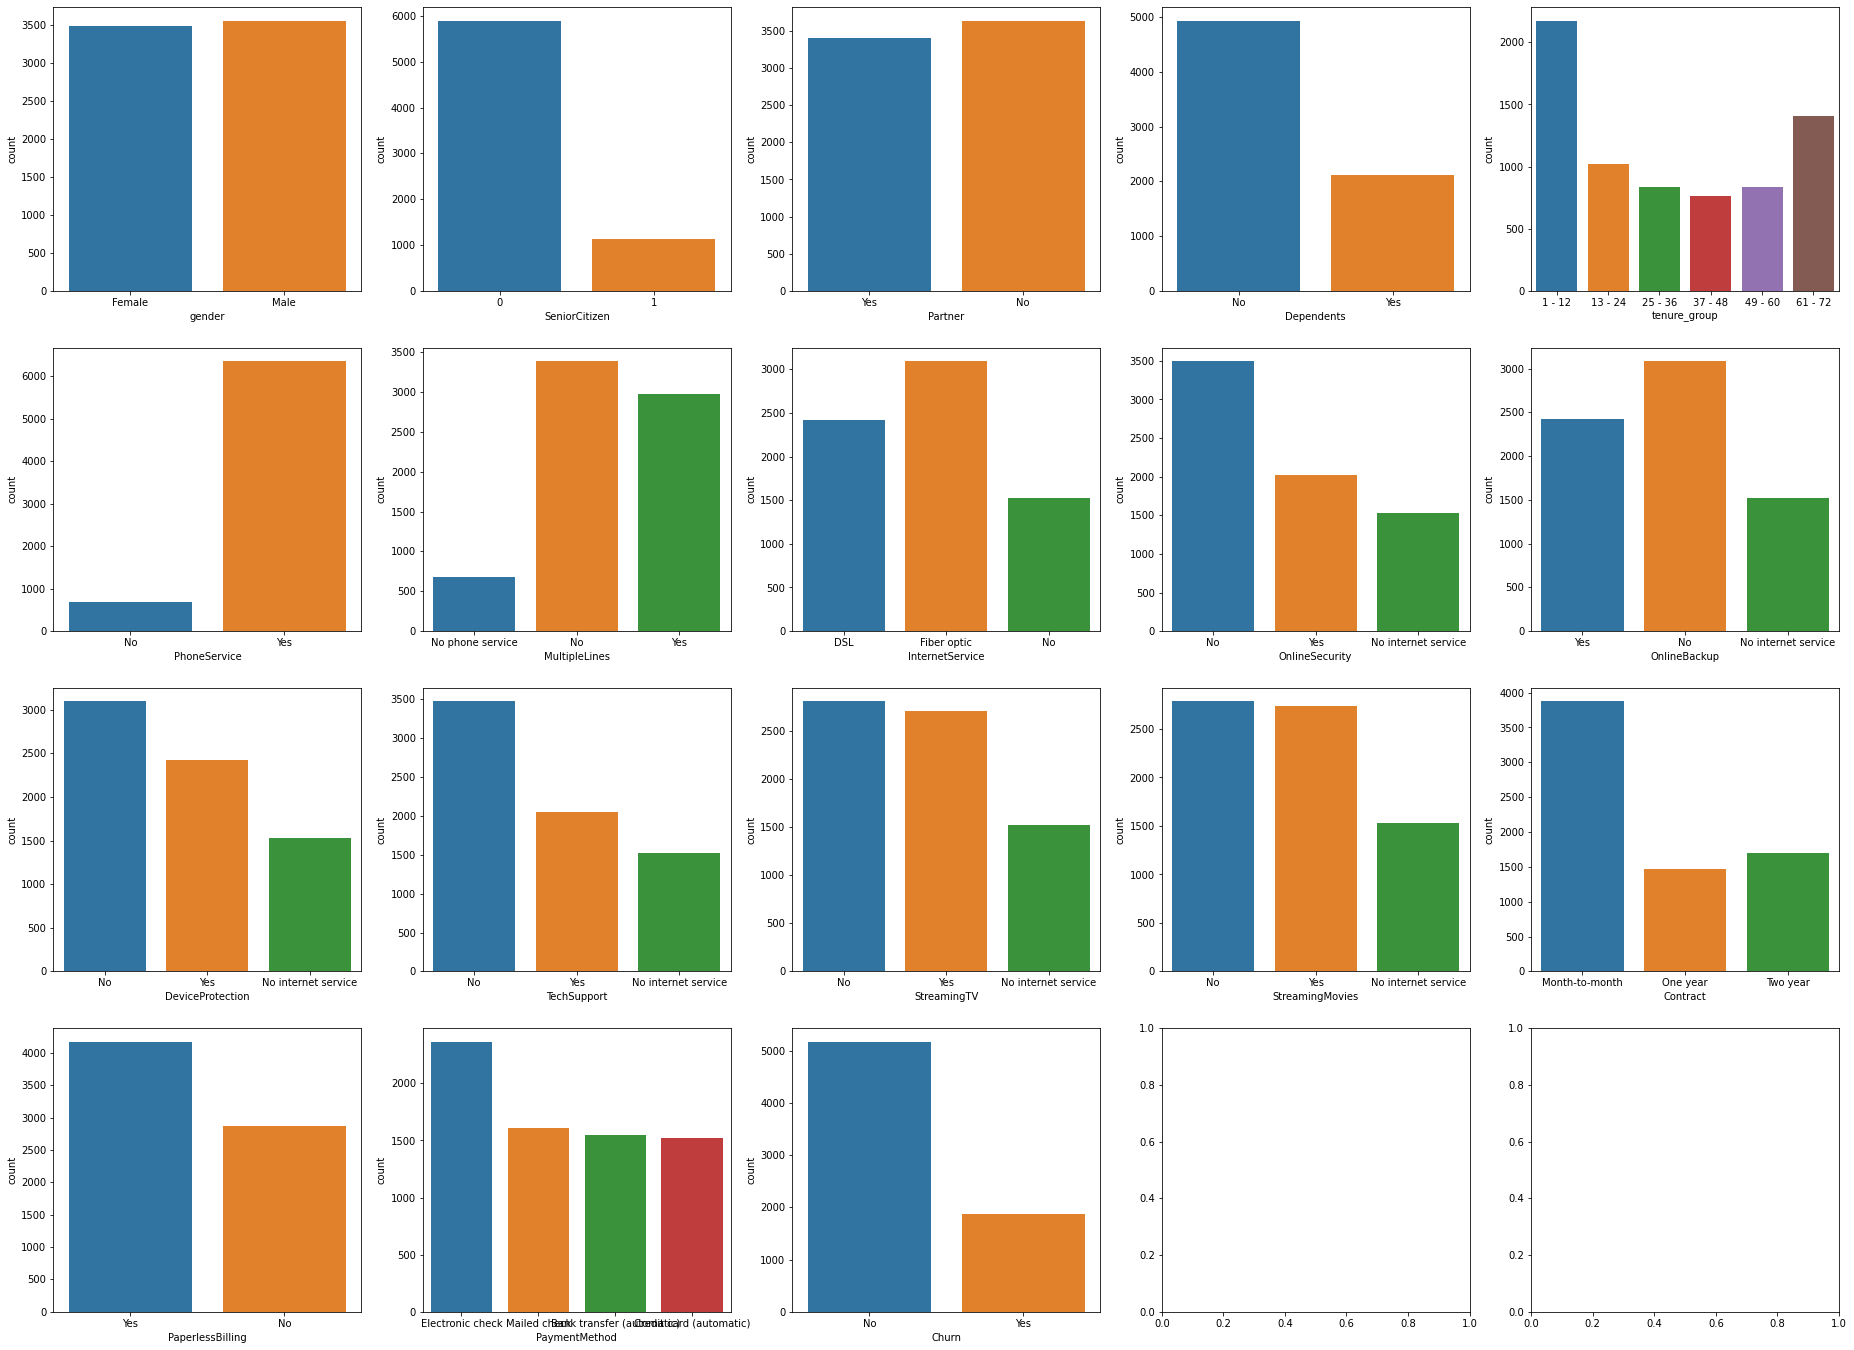

In [14]:
plt.rcParams['figure.figsize'] = [32, 24]
cols=list(range(len(dataset.columns)))
for i in [18,19,0]:    
    cols.remove(i)
fig, ax = plt.subplots(4,5)
x=0
y=0
for i,j in enumerate(dataset.columns[cols]):
    x=i%5
    y=i//5
    sns.countplot(ax=ax[y,x],x=j,data=dataset)


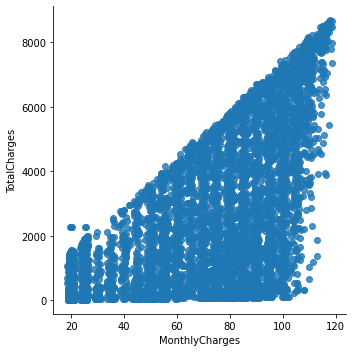

In [15]:
#Checking Dependency of Total Charges on Monthly Charges
sns.lmplot(data=dataset, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


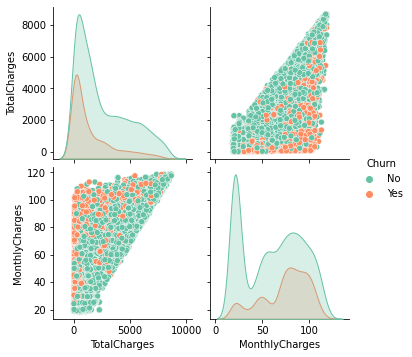

In [16]:
sns.pairplot(dataset[dataset.columns[[-2,-3,5,-1]]], hue = 'Churn',palette='Set2')


### Splitting Data into Dependent and Independent Variables

In [17]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
x=[0,2,3]
x.extend(list(range(4,17)))
Y=[4,7,14,16]
for i in Y:
    x.remove(i)

### Label Encoding of Ordinal Variables

In [18]:
le=LabelEncoder()
y=le.fit_transform(y).reshape(-1,1)
for i in x:
    X[:,i]=le.fit_transform(X[:,i])
    

### OneHot Encoding of Nominal Variables

In [19]:
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),Y)],remainder="passthrough")
X = np.array(ct.fit_transform(X))

#### Converting numerical columns to float

In [20]:
X=X.astype("float32")

### Handling Class Imbalance

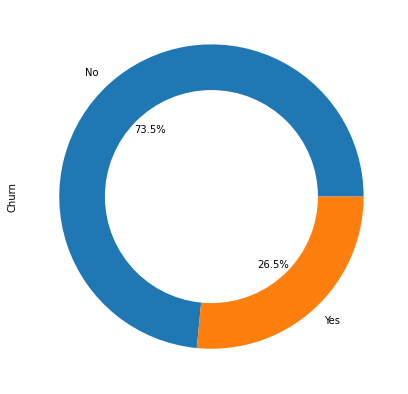

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
dataset['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [22]:
#Imbalance being removed using SMOTEENN
over=SMOTEENN()
X,y=over.fit_resample(X,y)


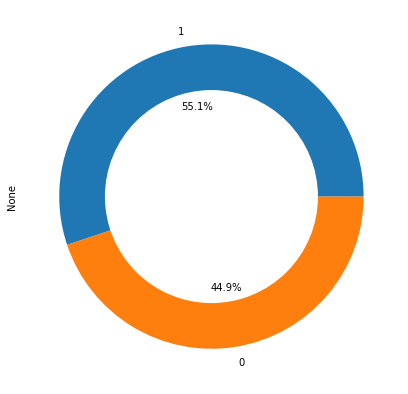

In [23]:
#Rechecking the class balancing
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
pd.Series(y).value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

### Normalization of Data

In [24]:
sc=MinMaxScaler()
X=sc.fit_transform(X)

### Splitting the dataset into the Training set and Test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Part 3 - Classification Using Deep Learning ( Artificial Neural Networks )

### Initializing the ANN

In [26]:
ann = tf.keras.models.Sequential()

2022-03-16 11:04:08.066313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 11:04:08.071523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 11:04:08.072227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 11:04:08.073257: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

### Adding the input layer and the hidden layers

In [27]:
ann.add(tf.keras.layers.Dense(units=32,input_dim=len(X[1]), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))


In [28]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.1))


### Adding the output layer

In [29]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

### Compiling the ANN

In [30]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the ANN model on the Training set

In [31]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

2022-03-16 11:04:15.115402: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
130/130 [==============================] - 2s 3ms/step - loss: 0.4979 - accuracy: 0.8364
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8838
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.8833
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8947
Epoch 5/100
130/130 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.8896
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2881 - accuracy: 0.8959
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.8940
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.9034
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.9054
Epoch 10/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2646 - accura

### Predicting the results of the Test set

In [32]:
y_pred = ann.predict(X_test)
y_fin=[]
for i in y_pred:
    if i>=0.5:
        y_fin.append(1)
    else:
        y_fin.append(0)

### Model Results

In [33]:
print(classification_report(np.array(y_fin),y_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       767
           1       0.94      0.93      0.94      1004

    accuracy                           0.93      1771
   macro avg       0.93      0.93      0.93      1771
weighted avg       0.93      0.93      0.93      1771



<AxesSubplot:>

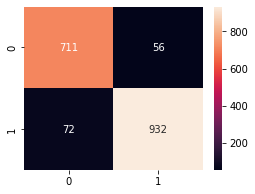

In [34]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(np.array(y_fin),y_test),annot=True,fmt="g")

## Part 4- Machine Learning Models

### - Gaussian Naive Bayes

#### Training Model and Generating Predictions

In [35]:
import cupy
model=GaussianNB()
model.fit(cupy.array(X_train),cupy.array(y_train))
p=model.predict(X_test)


#### Evaluating Results

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       706
           1       0.94      0.87      0.90      1065

    accuracy                           0.89      1771
   macro avg       0.88      0.89      0.89      1771
weighted avg       0.89      0.89      0.89      1771



<AxesSubplot:>

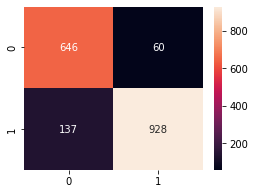

In [36]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")

### - K Nearest Neighbors

#### Training Model and Generating Predictions

In [37]:
model=KNeighborsClassifier()
model.fit(cupy.array(X_train),cupy.array(y_train))
p=model.predict(X_test)


#### Evaluating Results

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       662
           1       0.97      0.87      0.92      1109

    accuracy                           0.90      1771
   macro avg       0.89      0.91      0.90      1771
weighted avg       0.91      0.90      0.90      1771



<AxesSubplot:>

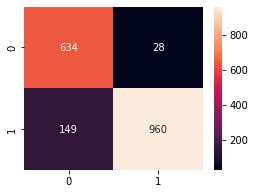

In [38]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")

### - Logistic Regression

#### Training model and Generating Predictions

In [39]:
model=LogisticRegression()
model.fit(cupy.array(X_train),cupy.array(y_train))
p=model.predict(X_test)


#### Evaluating Results

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       775
           1       0.92      0.92      0.92       996

    accuracy                           0.91      1771
   macro avg       0.91      0.91      0.91      1771
weighted avg       0.91      0.91      0.91      1771



<AxesSubplot:>

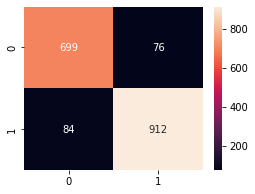

In [40]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")

### - Decision Tree Classifier

#### Training model and Generating Predictions

In [41]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
p=model.predict(X_test)

#### Evaluating Results

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       762
           1       0.95      0.93      0.94      1009

    accuracy                           0.93      1771
   macro avg       0.93      0.93      0.93      1771
weighted avg       0.93      0.93      0.93      1771



<AxesSubplot:>

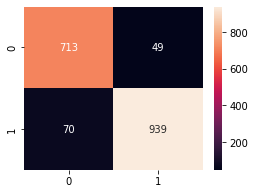

In [42]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")

### - Random Forest Classifier

#### Training model and Generating Predictions

In [43]:
import cupy
model=RandomForestClassifier(max_features=1.0,
                   n_bins=10,
                   n_estimators=100,max_depth=6,random_state=100,min_samples_leaf=8)
model.fit(cupy.array(X_train),cupy.array(y_train))
p=model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/cuml/internals/api_decorators.py:794: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams==1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


#### Evaluating Results

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       747
         1.0       0.96      0.93      0.94      1024

    accuracy                           0.93      1771
   macro avg       0.93      0.94      0.93      1771
weighted avg       0.94      0.93      0.93      1771



<AxesSubplot:>

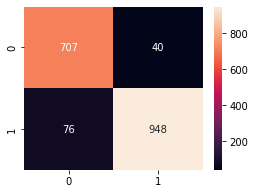

In [44]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")

### - Ada Boosting Classifier

#### Training model and Generating Predictions

In [45]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)
p=model.predict(X_test)

#### Evaluating Results

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       761
           1       0.96      0.94      0.95      1010

    accuracy                           0.95      1771
   macro avg       0.95      0.95      0.95      1771
weighted avg       0.95      0.95      0.95      1771



<AxesSubplot:>

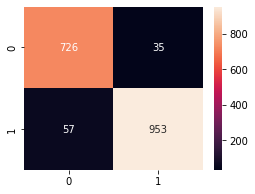

In [46]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")

### - Gradient Boosting Classifier

#### Training model and Generating Predictions

In [47]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
p=model.predict(X_test)

#### Evaluating Results


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       778
           1       0.96      0.96      0.96       993

    accuracy                           0.96      1771
   macro avg       0.95      0.96      0.95      1771
weighted avg       0.96      0.96      0.96      1771



<AxesSubplot:>

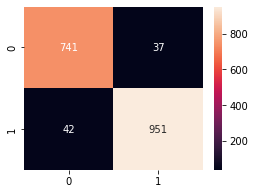

In [48]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")

### - XGB Classifier

#### Training model and Generating Predictions

In [49]:
model=XGBClassifier(use_label_encoder=False,verbosity=0)
model.fit(X_train,y_train)
p=model.predict(X_test)

#### Evaluating Results


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       773
           1       0.97      0.96      0.97       998

    accuracy                           0.96      1771
   macro avg       0.96      0.96      0.96      1771
weighted avg       0.96      0.96      0.96      1771



<AxesSubplot:>

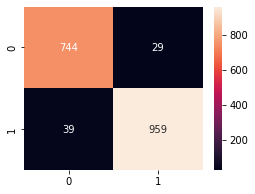

In [50]:
plt.figure(figsize=(4,3))
print(classification_report(p,y_test))
sns.heatmap(confusion_matrix(p,y_test),annot=True,fmt="g")